<a href="https://colab.research.google.com/github/samuel-zahner/projects/blob/master/Maze_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import heapq

#Code for Plotting

In [ ]:
#plot final path
def plot_path(path, obstacles, dimension):
  step_size = 10
  obstacle_color = np.array([0,0,0])
  path_color = np.array([0,255,0])

  # plot given the info as listed 
  path_plot = np.zeros((step_size*dimension, step_size*dimension, 3)).astype(int) + 255
  # add grid
  path_plot[step_size-1::step_size,:,:] = 0
  path_plot[:,step_size-1::step_size,:] = 0
    
  for i in obstacles:
    path_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = obstacle_color
    
  #plot path nodes 
  for i in path:
    path_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = path_color

  plt.xticks([], [])
  plt.yticks([], [])

  img = plt.imshow(path_plot)
  return img

#plot each step
def plot_step(current_node, fringe, explored, obstacles, dimension):
  step_size = 10
  obstacle_color = np.array([0,0,0])
  current_color = np.array([0,255,0])
  explored_color = np.array([153,153,255])
  fringe_color = np.array([192,192,192])


  # plot given the info as listed 
  step_plot = np.zeros((step_size*dimension, step_size*dimension, 3)).astype(int) + 255
  # add grid
  step_plot[step_size-1::step_size,:,:] = 0
  step_plot[:,step_size-1::step_size,:] = 0
    
  for i in obstacles:
    step_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = obstacle_color

  for i in explored:
    step_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = explored_color
  
  for i, j in fringe:
    step_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = fringe_color

    
  #plot current node
  step_plot[step_size*current_node[0]:step_size*current_node[0] + step_size-1, step_size*current_node[1]:step_size*current_node[1] + step_size-1] = current_color

  plt.xticks([], [])
  plt.yticks([], [])

  img = plt.imshow(step_plot)
  return img

#plot each step for A* search
def plot_step_a(current_node, fringe, explored, obstacles, dimension):
  step_size = 10
  obstacle_color = np.array([0,0,0])
  current_color = np.array([0,255,0])
  explored_color = np.array([153,153,255])
  fringe_color = np.array([192,192,192])


  # plot given the info as listed 
  step_plot = np.zeros((step_size*dimension, step_size*dimension, 3)).astype(int) + 255
  # add grid
  step_plot[step_size-1::step_size,:,:] = 0
  step_plot[:,step_size-1::step_size,:] = 0
    
  for i in obstacles:
    step_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = obstacle_color

  for i in explored:
    step_plot[step_size*i[0]:step_size*i[0] + step_size-1, step_size*i[1]:step_size*i[1] + step_size-1] = explored_color
  
  for i, j, k, l in fringe:
    step_plot[step_size*k[0]:step_size*k[0] + step_size-1, step_size*k[1]:step_size*k[1] + step_size-1] = fringe_color

    
  #plot current node
  step_plot[step_size*current_node[0]:step_size*current_node[0] + step_size-1, step_size*current_node[1]:step_size*current_node[1] + step_size-1] = current_color

  plt.xticks([], [])
  plt.yticks([], [])

  img = plt.imshow(step_plot)
  return img

# Breadth First Search Algorithm

In [ ]:
#breadth first search
def bfs(start, goal, dimension, obstacles):
  fringe = []
  path = []
  fringe.append((start, []))
  explored_spaces = set([])
  success = False
  fig = plt.figure()
  imgs = []

  while len(fringe) > 0:
    #pop first node added
    current, path = fringe.pop(0)

    #check if goal
    if current == goal:
      path.append(goal)
      success = True
      break

    path.append(current)
    explored_spaces.add(current)
    #add valid neighbors to fringe
    for i in transitions:
      neighbor_vertical = current[0] + i[0]
      neighbor_horizontal = current[1] + i[1]

      #check if in obstacles
      if (neighbor_vertical, neighbor_horizontal) in obstacles:
        continue
      elif (neighbor_vertical, neighbor_horizontal) in explored_spaces:
        continue
      #check if valid
      elif neighbor_vertical < 0 or neighbor_vertical >= dimension:
        continue
      elif neighbor_horizontal < 0 or neighbor_horizontal >= dimension:
        continue

      #check if node is already in fringe
      in_fringe = False
      for i in fringe:
        if (neighbor_vertical, neighbor_horizontal) == i[0]:
          in_fringe = True

      #add node to fringe
      if not in_fringe:
        fringe.append(((neighbor_vertical, neighbor_horizontal), path[:]))

    img = plot_step(current, fringe, explored_spaces, obstacles, dimension)
    imgs.append([img])

  ani = animation.ArtistAnimation(fig, imgs, interval=400, blit=True,
                            repeat_delay=2000)

  #plot_path(path, obstacles, dimension)  
  return success, ani, path
    

# Depth First Search Algorithm

In [ ]:
#depth first search
def dfs(start, goal, dimension, obstacles):
  fringe = []
  path = []
  fringe.append((start, []))
  explored_spaces = set([])
  success = False
  fig = plt.figure()
  imgs = []

  while len(fringe) > 0:
    #pop last node added
    current, path = fringe.pop(-1)

    #check if goal
    if current == goal:
      path.append(goal)
      success = True
      break

    path.append(current)
    explored_spaces.add(current)

    #add valid neighbors to fringe
    for i in transitions:
      neighbor_vertical = current[0] + i[0]
      neighbor_horizontal = current[1] + i[1]

      #check if in obstacles
      if (neighbor_vertical, neighbor_horizontal) in obstacles:
        continue
      elif (neighbor_vertical, neighbor_horizontal) in explored_spaces:
        continue
      #check if valid
      elif neighbor_vertical < 0 or neighbor_vertical >= dimension:
        continue
      elif neighbor_horizontal < 0 or neighbor_horizontal >= dimension:
        continue

      #check if node is already in fringe
      in_fringe = False
      for i in fringe:
        if (neighbor_vertical, neighbor_horizontal) == i[0]:
          in_fringe = True
          
      #add node to fringe
      if not in_fringe:
        fringe.append(((neighbor_vertical, neighbor_horizontal), path[:]))

    img = plot_step(current, fringe, explored_spaces, obstacles, dimension)
    imgs.append([img])

  ani = animation.ArtistAnimation(fig, imgs, interval=400, blit=True,
                            repeat_delay=2000)

  #plot_path(path, obstacles, dimension)  
  return success, ani, path
    

# A* Search Algorithm

In [ ]:
#A* search
def a_search(start, goal, dimension, obstacles):
  fringe = []
  path = []
  fringe.append((euclidean(start, goal), 0, start, []))
  heapq.heapify(fringe)
  explored_spaces = set([])
  success = False
  fig = plt.figure()
  imgs = []

  while len(fringe) > 0:
    #pop first node added
    heuristic, distance, current, path = heapq.heappop(fringe)
    distance += 1
    #check if goal
    if current == goal:
      path.append(goal)
      success = True
      break

    path.append(current)
    explored_spaces.add(current)
    #add valid neighbors to fringe
    for i in transitions:
      neighbor_vertical = current[0] + i[0]
      neighbor_horizontal = current[1] + i[1]

      #check if in obstacles
      if (neighbor_vertical, neighbor_horizontal) in obstacles:
        continue
      elif (neighbor_vertical, neighbor_horizontal) in explored_spaces:
        continue
      #check if valid
      elif neighbor_vertical < 0 or neighbor_vertical >= dimension:
        continue
      elif neighbor_horizontal < 0 or neighbor_horizontal >= dimension:
        continue

      #check if node is already in fringe
      in_fringe = False
      for i in fringe:
        if (neighbor_vertical, neighbor_horizontal) == i[2]:
          in_fringe = True

      #add node to fringe
      if not in_fringe:
        heapq.heappush(fringe, (distance + euclidean(current, goal), distance, (neighbor_vertical, neighbor_horizontal), path[:]))

    img = plot_step_a(current, fringe, explored_spaces, obstacles, dimension)
    imgs.append([img])

  ani = animation.ArtistAnimation(fig, imgs, interval=400, blit=True,
                            repeat_delay=2000)

  #plot_path(path, obstacles, dimension)  
  return success, ani, path

#Helper Methods

In [ ]:
#generate obstacles based on density
def generate_obstacles(obstacle_density, dimension):
  obstacles = set([])
  for i in range(dimension):
    for j in range(dimension):
      if i == 0 and j == 0 or i == dimension-1 and j == dimension-1:
        continue
      if np.random.uniform(0,1) < obstacle_density:
        obstacles.add((i,j))
  return obstacles

In [ ]:
#helper method to calculate euclidean heuristic
def euclidean(start,end):
    distance = ((end[0]-start[0])**2 + (end[1]-start[1])**2)**0.5
    return distance

In [ ]:
#get input from user
while True:
  try:
    dimension = int(input("Enter dimension of maze: "))
    if dimension < 2:
      raise ValueError
    break
  except ValueError:
    print("Dimension must be greater than 1")

while True:
  try:
    obstacle_density = float(input("Enter obstacle density: "))
    if obstacle_density < 0 or obstacle_density > 1:
      raise ValueError
    break
  except ValueError:
    print("Obstacle density must be between 0 and 1")

obstacles = generate_obstacles(obstacle_density, dimension)


Enter dimension of maze: 12
Enter obstacle density: 0.3


## **Breadth First Search Results**

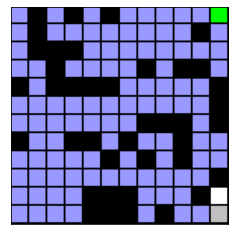

In [ ]:
transitions = [(1,0), (0,-1), (0,1), (-1,0)]
start = (0,0)
goal = (dimension-1, dimension-1)
success, ani, path = bfs(start, goal, dimension, obstacles)

#animate search algorithm
HTML(ani.to_html5_video())

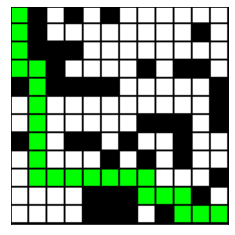

In [ ]:
#bfs path taken
plot_path(path, obstacles, dimension)

## **Depth First Search Results**

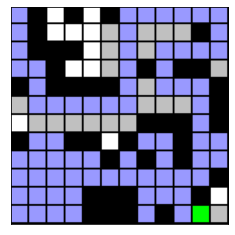

In [ ]:
success, ani, path = dfs(start, goal, dimension, obstacles)
#animate search algorithm
HTML(ani.to_html5_video())

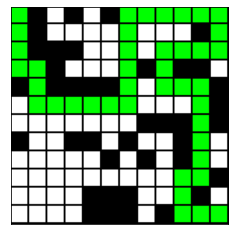

In [ ]:
#dfs path taken
plot_path(path, obstacles, dimension)

## **A* Search Results**

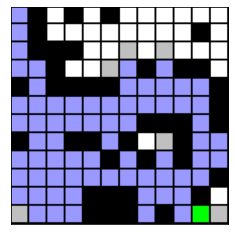

In [ ]:
success, ani, path = a_search(start, goal, dimension, obstacles)
#animate search algorithm
HTML(ani.to_html5_video())

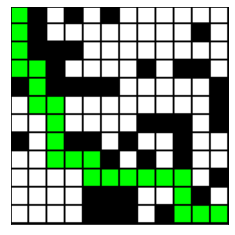

In [ ]:
#A* path taken
plot_path(path, obstacles, dimension)